In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



import warnings
warnings.filterwarnings('ignore')

#### TODO's e Dúvidas

- Precisa separar treino e teste como sempre fazemos? Ou não, pois já tem 2 arquivos separados
- Testar se dados já estão normalizados, mas perguntar tb
- Ver variáveis que não são relevantes 


In [36]:
teste = pd.read_excel('teste.xlsx')
teste.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,1,1.037165,-0.064713,-0.568709,0.206423,-0.096319,-0.605072,0.055348,-0.131739,0.371072,...,-0.117455,-0.549680,0.251234,0.084659,0.032844,-0.153479,-0.161900,0.051674,-0.146485,-0.167351
1,2,0.999413,-0.625445,-0.260484,-0.447270,-0.561264,-0.135433,-0.514644,0.025099,-0.054974,...,-0.028290,-0.060495,-0.072014,-0.019791,0.826528,-0.126800,-0.407177,0.358392,0.032858,0.027424
2,3,0.045767,0.502259,-0.111723,-0.217624,0.333774,-0.494176,0.474073,-0.042395,-0.021013,...,-0.113273,-0.276434,-0.443233,-0.090445,0.115143,0.295289,-0.160795,-0.216980,-0.010688,-0.163363
3,4,0.989824,-0.092475,-0.532103,0.060062,-0.107619,-0.324415,-0.043913,-0.017683,0.442919,...,0.338480,-0.752412,0.277020,-0.412178,-0.263633,-0.047919,-0.156259,0.321330,-0.170045,-0.047757
4,5,0.512949,-0.085913,0.601859,0.621950,-0.318286,0.549537,-0.469326,0.284619,0.346332,...,0.695699,-0.064083,-0.040918,0.050274,-0.169468,0.045432,-0.211822,-0.365970,-0.101814,0.049579


In [37]:
treino = pd.read_excel('treino.xlsx')
treino.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
0,1,-0.299468,0.533339,0.592928,0.094916,0.015414,0.019142,0.045814,0.177430,-0.040845,...,-0.006907,0.082039,0.783691,0.046401,-0.181900,0.201659,0.186339,0.052175,0.081669,0
1,2,0.529493,-0.094837,0.341711,0.568313,-0.318345,0.201856,-0.302414,0.208240,0.290601,...,-0.934574,0.248362,0.231307,-0.121390,0.045858,-0.088862,-0.320489,-0.132945,0.051778,0
2,3,0.605630,-0.024632,-0.042535,-0.023267,-0.135464,-0.141456,0.093773,-0.093751,-0.586908,...,0.681119,-0.082467,-0.037362,-0.923501,0.024895,0.135814,-0.367899,-0.084424,-0.273891,0
3,4,-0.346173,0.647783,0.473604,-0.165712,0.127780,-0.221239,0.295904,0.076857,-0.220782,...,0.560604,0.001884,0.409169,0.236170,-0.362497,-0.085438,0.210089,0.112295,-0.136954,0
4,5,0.240050,-0.688908,0.525568,0.434648,-0.371745,0.799044,-0.332958,0.227423,0.783561,...,0.561863,-0.483898,0.041915,-0.616440,0.548586,-0.956886,-0.379454,0.235959,0.035924,0


In [38]:
teste.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
count,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,...,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000
mean,27449.500000,0.129338,0.009623,0.359355,0.066747,-0.133487,0.005784,-0.072828,0.053851,0.048000,...,-0.149019,0.064110,0.110057,0.064483,0.042211,0.037968,-0.059468,-0.011124,0.003549,-0.024291
std,15847.831876,0.652884,0.540415,0.518510,0.609783,0.491579,0.550567,0.391734,0.313164,0.540543,...,0.581995,0.562088,0.429046,0.430158,0.385574,0.359985,0.379407,0.350674,0.197014,0.186348
min,1.000000,-10.918341,-22.123957,-9.201208,-2.534742,-8.766127,-12.829875,-15.589900,-14.451721,-3.506418,...,-8.090082,-2.097933,-7.792510,-2.034608,-5.889420,-10.378384,-3.728030,-1.805896,-3.674938,-6.712484
25%,13725.250000,-0.345834,-0.263581,0.120212,-0.354770,-0.429732,-0.322370,-0.318074,-0.049793,-0.291314,...,-0.441953,-0.318176,-0.123855,-0.193361,-0.186510,-0.176471,-0.283895,-0.223478,-0.075822,-0.105212
50%,27449.500000,0.494794,0.023224,0.386744,0.067949,-0.163524,-0.105000,-0.054910,0.031792,-0.007970,...,-0.015640,0.028253,0.061438,0.106992,0.051757,0.013652,-0.047213,-0.016369,-0.020597,-0.033558
75%,41173.750000,0.604971,0.328416,0.657904,0.472226,0.086932,0.154755,0.162645,0.139481,0.389946,...,0.264024,0.434215,0.318340,0.386859,0.283165,0.222927,0.169478,0.203846,0.051493,0.040062
max,54898.000000,1.195408,7.710259,1.994073,6.273999,17.290630,3.681800,6.446965,7.941294,4.041830,...,2.183938,2.988132,3.039226,1.569762,2.045384,4.422652,2.423943,1.937149,7.703920,11.004756


In [39]:
treino.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
count,164231.000000,164231.000000,164231.000000,164231.000000,164231.000000,164231.000000,164231.000000,164231.000000,164231.000000,164231.000000,...,164231.000000,164231.000000,164231.000000,164231.000000,164231.000000,164231.000000,164231.000000,164231.000000,164231.000000,164231.000000
mean,82116.000000,0.020816,0.029036,0.274890,0.023903,-0.063158,0.087255,-0.061199,0.081759,-0.048293,...,-0.011870,0.008342,0.050925,-0.005003,0.011869,-0.002755,-0.001820,0.005290,-0.012604,0.002149
std,47409.550367,0.709996,0.592437,0.580047,0.631710,0.547314,0.615860,0.414050,0.371658,0.520265,...,0.503129,0.387392,0.450866,0.395180,0.340751,0.395404,0.376164,0.226855,0.219044,0.046312
min,1.000000,-14.903862,-19.758520,-9.861436,-2.631825,-18.795629,-8.178917,-10.938095,-14.285038,-4.378475,...,-2.186889,-6.544954,-2.077864,-5.869785,-9.552718,-2.992795,-2.140814,-9.339533,-7.344810,0.000000
25%,41058.500000,-0.445887,-0.296836,-0.048311,-0.398327,-0.422133,-0.311252,-0.326514,-0.046780,-0.369624,...,-0.341358,-0.178984,-0.241970,-0.242971,-0.217476,-0.237657,-0.234916,-0.087263,-0.091830,0.000000
50%,82116.000000,-0.026290,0.023532,0.359776,0.018997,-0.087875,-0.027857,-0.048578,0.069393,-0.087079,...,-0.021518,0.007464,0.085418,0.015863,-0.017930,-0.004414,0.002972,-0.017977,-0.018410,0.000000
75%,123173.500000,0.590285,0.422750,0.651813,0.456228,0.209398,0.269618,0.201480,0.217418,0.262494,...,0.318814,0.206405,0.398215,0.257137,0.200453,0.241715,0.236165,0.067870,0.060383,0.000000
max,164231.000000,1.215247,8.034236,3.072789,6.134471,11.412148,8.116984,19.912049,9.135293,6.711957,...,1.996423,3.037430,2.346662,2.917496,3.663483,1.941749,2.045487,6.792875,11.031473,1.000000


## Separar Treino e Teste

- Revisar para treinar apenas com o df de treino
- testar sem normalizar

In [41]:
# Separar atributos e variável de destino
X = treino.iloc[:, 1:-1]  # Atributos (colunas V1 a V21)
y = treino["Class"]  # Variável de destino (coluna Class)

# Dividir dados de treinamento em treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Padronizar os atributos - Necessário ou já está padronizado?

In [42]:
# Padronizar os atributos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(teste.iloc[:, 1:])  # Aplicar a padronização aos dados de teste

### Regressão Logística

In [45]:
# Treinar e avaliar um modelo de regressão logística
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_val_logreg = logreg.predict(X_val_scaled)
accuracy_logreg = accuracy_score(y_val, y_pred_val_logreg)


print("Regressão Logística - Resultados de Validação:")
#print(classification_report(y_val, y_pred_val_logreg))
print("AUC Score:", roc_auc_score(y_val, y_pred_val_logreg))
print("Accuracy:", accuracy_logreg)

Regressão Logística - Resultados de Validação:
AUC Score: 0.499938951802448
Accuracy: 0.9972600237464608


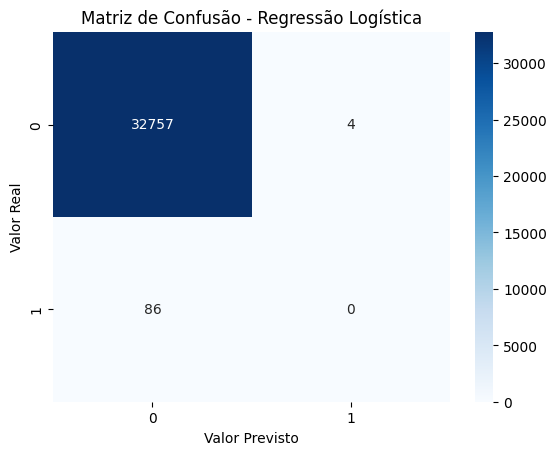

In [44]:
# Plotar a matriz de confusão - Regressão Logística
cm_logreg = confusion_matrix(y_val, y_pred_val_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
plt.show()

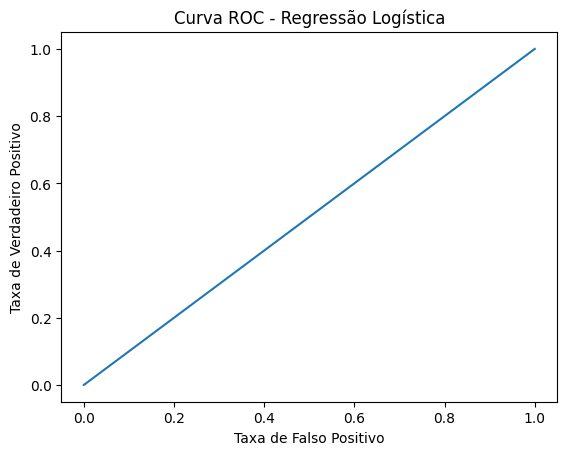

In [46]:
# Plotar a curva ROC - Regressão Logística
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_val, y_pred_val_logreg)
plt.plot(fpr_logreg, tpr_logreg)
plt.title("Curva ROC - Regressão Logística")
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.show()

### KNN

In [47]:
# Treinar e avaliar um modelo k-NN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_val_knn = knn.predict(X_val_scaled)
accuracy_knn = accuracy_score(y_val, y_pred_val_knn)

print("k-NN - Resultados de Validação:")
#print(confusion_matrix(y_val, y_pred_val_knn))
#print(classification_report(y_val, y_pred_val_knn))
print("AUC Score:", roc_auc_score(y_val, y_pred_val_knn))
print("Accuracy:", accuracy_knn)

k-NN - Resultados de Validação:
AUC Score: 0.5
Accuracy: 0.9973818004688404


In [48]:
# Fazer previsões no conjunto de teste
y_pred_test = logreg.predict(X_test_scaled)  # Utilize o modelo de regressão logística para prever as classes no conjunto de teste
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

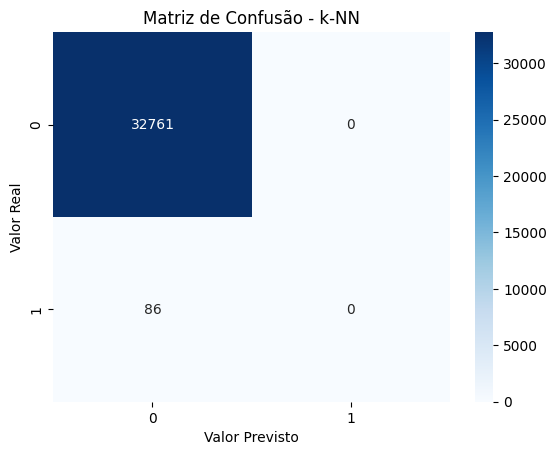

In [49]:
# Plotar a matriz de confusão - k-NN
cm_knn = confusion_matrix(y_val, y_pred_val_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - k-NN")
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
plt.show()

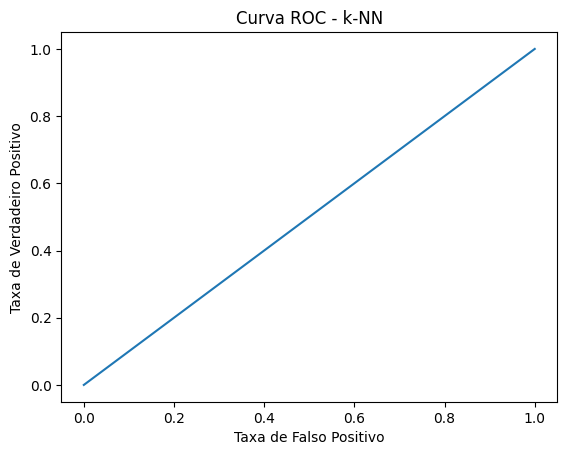

In [50]:
# Plotar a curva ROC - k-NN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_val, y_pred_val_knn)
plt.plot(fpr_knn, tpr_knn)
plt.title("Curva ROC - k-NN")
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.show()

# Fazer previsões no conjunto de teste
y_pred_test = logreg.predict(X_test_scaled)  # Utilize o modelo de regressão logística para prever as classes no conjunto de teste


In [17]:
output_df = pd.DataFrame({"id": teste["id"], "Class": y_pred_test})
output_df

,id,Class
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
54893,54894,0
54894,54895,0
54895,54896,0
54896,54897,0


## Árvore de Decisão

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Criação do modelo
decision_tree = DecisionTreeClassifier()

# Treinamento do modelo
decision_tree.fit(X_train_scaled, y_train)

# Previsões no conjunto de validação
y_pred_val_dt = decision_tree.predict(X_val_scaled)

# Avaliação do modelo
accuracy_dt = accuracy_score(y_val, y_pred_val_dt)
print("Árvore de Decisão - Resultados de Validação:")
print(confusion_matrix(y_val, y_pred_val_dt))
print(classification_report(y_val, y_pred_val_dt))
print("AUC Score:", roc_auc_score(y_val, y_pred_val_dt))
print("Accuracy:", accuracy_dt)


Árvore de Decisão - Resultados de Validação:
[[32696    65]
 [   85     1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32761
           1       0.02      0.01      0.01        86

    accuracy                           1.00     32847
   macro avg       0.51      0.50      0.51     32847
weighted avg       0.99      1.00      1.00     32847

AUC Score: 0.5048219202781526
Accuracy: 0.995433372910768


## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Criação do modelo
random_forest = RandomForestClassifier()

# Treinamento do modelo
random_forest.fit(X_train_scaled, y_train)

# Previsões no conjunto de validação
y_pred_val_rf = random_forest.predict(X_val_scaled)

# Avaliação do modelo
accuracy_rf = accuracy_score(y_val, y_pred_val_rf)
print("Random Forest - Resultados de Validação:")
print(confusion_matrix(y_val, y_pred_val_rf))
print(classification_report(y_val, y_pred_val_rf))
print("AUC Score:", roc_auc_score(y_val, y_pred_val_rf))
print("Accuracy:", accuracy_rf)


Random Forest - Resultados de Validação:
[[32761     0]
 [   86     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32761
           1       0.00      0.00      0.00        86

    accuracy                           1.00     32847
   macro avg       0.50      0.50      0.50     32847
weighted avg       0.99      1.00      1.00     32847

AUC Score: 0.5
Accuracy: 0.9973818004688404


## Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

# Criação do modelo
gradient_boosting = GradientBoostingClassifier()

# Treinamento do modelo
gradient_boosting.fit(X_train_scaled, y_train)

# Previsões no conjunto de validação
y_pred_val_gb = gradient_boosting.predict(X_val_scaled)

# Avaliação do modelo
accuracy_gb = accuracy_score(y_val, y_pred_val_gb)
print("Gradient Boosting - Resultados de Validação:")
print(confusion_matrix(y_val, y_pred_val_gb))
print(classification_report(y_val, y_pred_val_gb))
print("AUC Score:", roc_auc_score(y_val, y_pred_val_gb))
print("Accuracy:", accuracy_gb)


Gradient Boosting - Resultados de Validação:
[[32747    14]
 [   86     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32761
           1       0.00      0.00      0.00        86

    accuracy                           1.00     32847
   macro avg       0.50      0.50      0.50     32847
weighted avg       0.99      1.00      1.00     32847

AUC Score: 0.4997863313085681
Accuracy: 0.996955581940512


## Support Vector Machines (SVM):

In [54]:
from sklearn.svm import SVC

# Criação do modelo
svm = SVC()

# Treinamento do modelo
svm.fit(X_train_scaled, y_train)

# Previsões no conjunto de validação
y_pred_val_svm = svm.predict(X_val_scaled)

# Avaliação do modelo
accuracy_svm = accuracy_score(y_val, y_pred_val_svm)
print("SVM - Resultados de Validação:")
print(confusion_matrix(y_val, y_pred_val_svm))
print(classification_report(y_val, y_pred_val_svm))
print("AUC Score:", roc_auc_score(y_val, y_pred_val_svm))
print("Accuracy:", accuracy_svm)


SVM - Resultados de Validação:
[[32761     0]
 [   86     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32761
           1       0.00      0.00      0.00        86

    accuracy                           1.00     32847
   macro avg       0.50      0.50      0.50     32847
weighted avg       0.99      1.00      1.00     32847

AUC Score: 0.5
Accuracy: 0.9973818004688404


## Redes Neurais

In [55]:
from sklearn.neural_network import MLPClassifier

# Criação do modelo
neural_network = MLPClassifier()

# Treinamento do modelo
neural_network.fit(X_train_scaled, y_train)

# Previsões no conjunto de validação
y_pred_val_nn = neural_network.predict(X_val_scaled)

# Avaliação do modelo
accuracy_nn = accuracy_score(y_val, y_pred_val_nn)
print("Redes Neurais - Resultados de Validação:")
print(confusion_matrix(y_val, y_pred_val_nn))
print(classification_report(y_val, y_pred_val_nn))
print("AUC Score:", roc_auc_score(y_val, y_pred_val_nn))
print("Accuracy:", accuracy_nn)


Redes Neurais - Resultados de Validação:
[[32748    13]
 [   84     2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32761
           1       0.13      0.02      0.04        86

    accuracy                           1.00     32847
   macro avg       0.57      0.51      0.52     32847
weighted avg       1.00      1.00      1.00     32847

AUC Score: 0.5114295003347002
Accuracy: 0.9970469144822968


# Hiperparâmetros e validação cruzada


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Separar atributos e variável de destino
X = treino.iloc[:, 1:-1]  # Atributos (colunas V1 a V21)
y = treino["Class"]  # Variável de destino (coluna Class)

# Definir os hiperparâmetros que serão testados
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Criar o classificador de Árvore de Decisão
clf = DecisionTreeClassifier()

# Criar o objeto de busca por hiperparâmetros
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Realizar a busca por hiperparâmetros otimizados usando validação cruzada
grid_search.fit(X, y)

# Obter os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Treinar o modelo com os melhores hiperparâmetros encontrados
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X, y)

# Fazer previsões no conjunto de teste
X_test = teste.iloc[:, 1:]
y_pred = best_clf.predict(X_test)

# Calcular a acurácia das previsões
accuracy = accuracy_score(y, y_pred)

# Imprimir os melhores hiperparâmetros e a acurácia
print("Melhores hiperparâmetros:", best_params)
#Melhores hiperparâmetros: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5}
print("Acurácia:", accuracy)


# Separar atributos e variável de destino para o conjunto de teste
X_test = teste.iloc[:, 1:]  # Atributos (colunas V1 a V21)
y_test = teste["Class"]  # Variável de destino (coluna Class)

# Fazer previsões no conjunto de teste
y_pred = best_clf.predict(X_test)

# Calcular a acurácia das previsões
accuracy = accuracy_score(y_test, y_pred)

# Imprimir os melhores hiperparâmetros e a acurácia
print("Melhores hiperparâmetros:", best_params)
print("Acurácia:", accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [32847, 54898]

In [58]:
# Separar atributos e variável de destino para o conjunto de teste
X_test = teste.iloc[:, 1:]  # Atributos (colunas V1 a V21)
y_test = teste["Class"]  # Variável de destino (coluna Class)

# Fazer previsões no conjunto de teste
y_pred = best_clf.predict(X_test)

# Calcular a acurácia das previsões
accuracy = accuracy_score(y_test, y_pred)

# Imprimir os melhores hiperparâmetros e a acurácia
print("Melhores hiperparâmetros:", best_params)
print("Acurácia:", accuracy)

KeyError: 'Class'

In [57]:
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5}


A acurácia é uma métrica comumente usada para avaliar a qualidade de um modelo de classificação. Ela mede a proporção de previsões corretas em relação ao total de previsões. No entanto, a acurácia nem sempre é a métrica mais confiável, especialmente quando os dados estão desbalanceados, como é o caso do seu conjunto de dados, em que a classe "fraude" é uma parcela pequena da amostra.

Em casos de desbalanceamento de classes, a acurácia pode ser enganosa, pois um modelo pode obter uma alta acurácia simplesmente prevendo a classe majoritária em todos os casos, ignorando completamente a classe minoritária. Isso pode ser problemático quando nosso interesse principal é detectar corretamente as transações fraudulentas.

Para mitigar as falhas da acurácia em cenários de desbalanceamento de classes, é recomendável considerar outras métricas, como:

    Matriz de Confusão: Uma matriz que mostra a contagem de verdadeiros positivos (TP), falsos positivos (FP), verdadeiros negativos (TN) e falsos negativos (FN). Essa matriz fornece uma visão mais detalhada do desempenho do modelo em termos de classificações corretas e incorretas.

    Precisão (Precision): Mede a proporção de verdadeiros positivos em relação ao total de previsões positivas. É uma métrica útil para avaliar o modelo em termos de quantas das previsões positivas são realmente corretas.

    Recall (Sensibilidade ou Revocação): Mede a proporção de verdadeiros positivos em relação ao total de casos positivos reais. É uma métrica útil para avaliar o modelo em termos de sua capacidade de detectar corretamente os casos positivos.

    F1-Score: É uma média harmônica entre a precisão e o recall. Fornece uma métrica equilibrada que leva em consideração tanto os verdadeiros positivos quanto os falsos negativos.

    Área sob a Curva ROC (AUC-ROC): Mede a capacidade discriminativa do modelo em distinguir entre as classes. A curva ROC representa a taxa de verdadeiros positivos em relação à taxa de falsos positivos em vários pontos de corte de probabilidade. Quanto maior a área sob a curva, melhor o desempenho do modelo.

É importante considerar essas métricas em conjunto para obter uma avaliação mais completa do desempenho do modelo. No código fornecido anteriormente, já foram incluídas as métricas de precisão, recall, F1-score e AUC-ROC para ambos os modelos de regressão logística e k-NN.

É possível comparar os modelos usando diferentes métricas de avaliação. Algumas métricas que podem ser usadas para comparar os modelos são:

    Acurácia: É a proporção de predições corretas em relação ao total de predições. Quanto maior a acurácia, melhor o modelo.

    Área sob a curva (AUC): Mede a capacidade do modelo em distinguir corretamente as classes. Quanto maior o valor da AUC, melhor o modelo.

    Precisão: Mede a proporção de verdadeiros positivos em relação ao total de predições positivas. Uma alta precisão indica que o modelo tem baixa taxa de falsos positivos.

    Revocação (Recall): Mede a proporção de verdadeiros positivos em relação ao total de amostras positivas. Uma alta revocação indica que o modelo tem baixa taxa de falsos negativos.

    F1-Score: É uma média harmônica entre precisão e revocação. Oferece uma medida balanceada entre as duas métricas.